**MELD SPEECH /SENTIMENT /EMOTION RECOGNITION**

In [1]:
import librosa 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import json
import math
from sklearn.preprocessing import LabelEncoder,StandardScaler
import csv
from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/declare-lab/MELD


Cloning into 'MELD'...
remote: Enumerating objects: 439, done.
remote: Total 439 (delta 0), reused 0 (delta 0), pack-reused 439
Receiving objects: 100% (439/439), 7.02 MiB | 7.78 MiB/s, done.
Resolving deltas: 100% (231/231), done.


In [3]:
train_data=pd.read_csv('/content/MELD/data/MELD/train_sent_emo.csv')
valid_data=pd.read_csv('/content/MELD/data/MELD/dev_sent_emo.csv')
test_data=pd.read_csv('/content/MELD/data/MELD/test_sent_emo.csv')

In [4]:
train_data.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [5]:
y_train=train_data['Sentiment']
y_valid=valid_data['Sentiment']
y_test=test_data['Sentiment']

In [6]:
data1 = pd.read_csv("/content/MELD/data/MELD/train_sent_emo.csv")
data2=pd.read_csv("/content/MELD/data/MELD/test_sent_emo.csv")

**DECLARING FEATURES FOR AUDIO DATA**

In [7]:
num_mfcc=40
sr=22050
hop_length=512
n_fft=2048

In [8]:
cd /content/drive/My Drive/MELD/test

/content/drive/.shortcut-targets-by-id/123/test


**EXTRACTING FEATURES FROM AUDIO DATA(.wav format)**

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
file = open('/content/drive/My Drive/MELD/X_test.csv', 'w', newline='')

with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
for audio_file in os.listdir('/content/drive/My Drive/MELD/test'):
  print(audio_file)
  try:
    str1 = audio_file.replace('.wav','')
    str2 = str1.replace('dia','')
    str3 = str2.replace('utt','')
    flag = False
    dialogue=''
    utt=''
    for char in str3:
      if char=='_':
        flag = True
        continue
      if flag==False:
        dialogue+=char
      if flag==True:
        utt+=char
    sentiment = data2[(data2['Dialogue_ID']==int(dialogue))&(data2['Utterance_ID']==int(utt))]['Sentiment']
    # if i==5:
    #   break
    # i=i+1
    print(dialogue,utt)
    audio = '/content/drive/My Drive/MELD/test/'+audio_file
    y, sr = librosa.load(audio, mono=True)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rmse(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=40)
    to_append = f'{audio_file} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    j=0
    for e in mfcc:
      to_append += f' {np.mean(e)}'
    senti = list(sentiment)[0]
    # print(emo)
    to_append += f' {senti}'
    print(to_append)
    file = open('/content/drive/My Drive/MELD/X_test.csv', 'a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split())
      # print(to_append.split())
      # print(len(to_append.split()))
  except:
    pass  
    



Streaming output truncated to the last 5000 lines.
213 11
dia213_utt11.wav 0.4480093117580123 0.031442321836948395 2210.9223298676093 2120.526766467377 4271.755292338709 0.12729439684139784 -248.09446809577295 99.33123288547985 -20.55910178489805 27.4959292879984 -7.552297200969264 5.731817186964175 -9.218775543391592 -11.657193563349399 -13.166314054646634 7.2482487938627 -8.522312126549362 3.2890019373659225 -5.878045816179759 -0.147790156891985 -8.86045472797813 -6.480835185588169 -11.487890831458037 0.2897154411450873 -4.683277147100911 -1.4343154716356887 -5.818498117903773 -3.5225311765559963 -7.742658843354046 -1.6055066434546612 -7.295056313477969 -1.1770425167730802 -6.991532770878242 -2.8800115554840415 -6.261274741693008 -1.8611224016712464 -6.827407352346978 -0.8045821567769291 -5.009093110887623 0.9413857341521834 -2.3026691363250467 3.176926047688632 -0.9025808492838261 2.6392548129388467 -2.230727032913176 0.8386929599401683 neutral
final_videos_testdia93_utt9.wav
dia234

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
file = open('/content/drive/My Drive/MELD/X_train.csv', 'w', newline='')

with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
i=0
for audio_file in os.listdir('/content/drive/My Drive/MELD/train'):
  print(audio_file)
  try:
    str1 = audio_file.replace('.wav','')
    str2 = str1.replace('dia','')
    str3 = str2.replace('utt','')
    flag = False
    dialogue=''
    utt=''
    for char in str3:
      if char=='_':
        flag = True
        continue
      if flag==False:
        dialogue+=char
      if flag==True:
        utt+=char
    sentiment = data1[(data1['Dialogue_ID']==int(dialogue))&(data1['Utterance_ID']==int(utt))]['Sentiment']
    # if i==5:
    #   break
    # i=i+1
    print(dialogue,utt)
    audio = '/content/drive/My Drive/MELD/train/'+audio_file
    y, sr = librosa.load(audio, mono=True)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rmse(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=40)
    to_append = f'{audio_file} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    j=0
    for e in mfcc:
      to_append += f' {np.mean(e)}'
    senti = list(sentiment)[0]
    # print(emo)
    to_append += f' {senti}'
    file = open('/content/drive/My Drive/MELD/X_train.csv', 'a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split())
      # print(to_append.split())
      # print(len(to_append.split()))
  except:
    pass  
  print(i)
  i+=1
  
  
    

**LOADING EXTRACTED 20 MFCC FEATURES FROM AUDIO DATA**





In [9]:
train_full=pd.read_csv('/content/drive/My Drive/MELD/X_train.csv')
test_full=pd.read_csv('/content/drive/My Drive/MELD/X_test.csv')

In [10]:
train_full.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,dia778_utt6.wav,0.320497,0.025775,2278.267013,2045.001656,4121.995780,0.132658,-309.587878,93.263950,-38.339277,12.680180,-4.150091,-6.342267,-8.869753,-10.267611,-10.339222,-1.431443,-10.255976,2.226234,-15.656542,0.679774,-3.699171,-6.610237,-6.721708,-1.701213,1.218225,5.182283,negative
1,dia966_utt4.wav,0.309084,0.067537,2023.156253,1795.556596,3739.001465,0.123459,-208.278967,111.048903,-50.069914,16.498679,-23.374736,-0.522334,3.919215,-2.678548,-8.774021,4.992524,-10.629645,-1.141919,-3.900141,6.199353,3.680139,2.178353,-4.498574,-3.838324,-2.324441,3.574812,positive
2,dia389_utt9.wav,0.432676,0.011799,3127.586425,2383.203487,5598.632812,0.190956,-338.133492,54.222828,-18.611850,40.350187,-10.624277,0.842528,-11.575715,-2.094807,-11.787553,-3.283661,-5.515349,-1.350605,-14.671990,1.010728,-0.525530,-3.958104,-10.262405,-0.936184,-12.591434,-6.095937,neutral
3,dia551_utt4.wav,0.285635,0.035523,2047.922606,2030.374706,3823.230092,0.102794,-298.024428,96.304718,-29.053474,16.398453,-11.771029,-3.280554,-11.168737,6.440051,-9.716096,14.528244,-7.446357,2.498292,-11.495910,0.017757,-11.936946,-8.162295,-4.166774,-0.209591,2.165451,10.249691,neutral
4,dia536_utt4.wav,0.338373,0.018891,2500.453601,2150.128162,4463.414307,0.143191,-383.047866,72.424600,-14.473551,20.726070,-8.213085,0.975116,-6.591600,5.178459,-8.222397,-0.564920,-9.461540,-2.451105,-10.613307,-0.147716,-7.465496,-9.533251,-6.152011,1.223559,-7.573138,0.062299,negative


In [11]:
test_full.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,dia240_utt16.wav,0.324931,0.031746,2054.398442,1856.361317,3885.397339,0.115814,-287.050315,112.387133,-22.866115,17.523469,-42.126518,0.338940,-4.904453,-6.004022,-4.555551,3.710614,-7.331799,1.922235,-8.865981,4.267557,-6.527622,-1.476507,-1.730565,1.792643,-3.840582,1.521578,negative
1,dia30_utt1.wav,0.378724,0.026426,2774.673203,2122.340291,4967.994155,0.173707,-324.026811,70.660971,-31.681549,22.865750,-23.385924,-7.462757,-13.022762,-0.673288,-8.646657,3.547161,-5.607968,-1.653507,-3.362319,-0.961176,-2.640426,-0.321908,0.172292,-1.671907,-2.464757,1.921912,positive
2,dia28_utt16.wav,0.462659,0.036661,2191.502395,2118.587424,4322.841797,0.122903,-260.800911,106.535328,-21.612117,20.090028,-8.704479,8.291151,-5.294349,5.449733,-10.920369,-4.739311,-4.448089,0.711071,-2.371496,-2.573395,-6.418156,-0.601965,-6.988787,-6.940802,-6.633869,-0.472048,neutral
3,dia76_utt6.wav,0.428561,0.019843,2078.930809,1731.312289,3743.721957,0.134079,-346.643248,111.854647,-64.573770,24.649186,-12.963668,-12.076232,-7.930319,-6.739774,-10.047958,9.045608,-13.164284,-0.660825,-14.872515,3.828698,-4.885659,-10.383553,-4.861939,-9.900147,-1.671096,5.083788,neutral
4,dia253_utt12.wav,0.405394,0.039651,2135.668255,2051.783683,4054.409464,0.116315,-284.918194,101.248524,-1.908331,24.122272,-21.302244,-14.316092,-12.365614,-4.300225,-11.922231,1.935890,-20.772826,-4.284306,-6.118407,6.983515,-3.632702,-5.224277,-9.915626,1.441196,-4.692616,-4.696144,neutral


In [12]:
X_full=train_full.drop(['filename','label'],axis=1)
X_test=test_full.drop(['filename','label'],axis=1)

In [13]:
y_full=train_full['label']
y_test=test_full['label']


**LABEL ENCODING CATEGORICAL VARIABLES**

In [14]:
le=LabelEncoder()
y_full=le.fit_transform(y_full)
y_test=le.transform(y_test)

**SCALING NUMERICAL VARIABLES** 



In [15]:
scaler = StandardScaler()
X_full= scaler.fit_transform(np.array(X_full.iloc[:, :], dtype = float))
X_test= scaler.transform(np.array(X_test.iloc[:, :], dtype = float))

**SPLITTING TRAIN DATA INTO TRAIN AND VALIDATION SETS**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

**TRAINING MODEL USING DEEP NEURAL NETWORK**

In [17]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30,batch_size=128,validation_data=(X_val,y_val))
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

Using TensorFlow backend.


Train on 7990 samples, validate on 1998 samples
Epoch 1/30
7990/7990 [==============================] - 2s 240us/step - loss: 1.0440 - accuracy: 0.4894 - val_loss: 1.0252 - val_accuracy: 0.5070
Epoch 2/30
7990/7990 [==============================] - 0s 26us/step - loss: 1.0144 - accuracy: 0.5041 - val_loss: 1.0191 - val_accuracy: 0.5170
Epoch 3/30
7990/7990 [==============================] - 0s 28us/step - loss: 0.9959 - accuracy: 0.5115 - val_loss: 1.0159 - val_accuracy: 0.5140
Epoch 4/30
7990/7990 [==============================] - 0s 27us/step - loss: 0.9799 - accuracy: 0.5254 - val_loss: 1.0204 - val_accuracy: 0.5180
Epoch 5/30
7990/7990 [==============================] - 0s 26us/step - loss: 0.9591 - accuracy: 0.5402 - val_loss: 1.0283 - val_accuracy: 0.4980
Epoch 6/30
7990/7990 [==============================] - 0s 26us/step - loss: 0.9356 - accuracy: 0.5508 - val_loss: 1.0254 - val_accuracy: 0.5025
Epoch 7/30
7990/7990 [==============================] - 0s 26us/step - loss: 0.91

**TRAINING MODEL USING LSTM**

In [ ]:
from keras import models
from keras import layers
X_train= X_train[...,np.newaxis]
X_val = X_val[...,np.newaxis]
X_test= X_test[...,np.newaxis]


model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,batch_size=128,validation_data=(X_val,y_val))
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

Train on 7990 samples, validate on 1998 samples
Epoch 1/20
7990/7990 [==============================] - 12s 2ms/step - loss: 1.0589 - accuracy: 0.4677 - val_loss: 1.0617 - val_accuracy: 0.4605
Epoch 2/20
7990/7990 [==============================] - 11s 1ms/step - loss: 1.0453 - accuracy: 0.4832 - val_loss: 1.0506 - val_accuracy: 0.4755
Epoch 3/20
7990/7990 [==============================] - 11s 1ms/step - loss: 1.0431 - accuracy: 0.4897 - val_loss: 1.0522 - val_accuracy: 0.4745
Epoch 4/20
7990/7990 [==============================] - 11s 1ms/step - loss: 1.0410 - accuracy: 0.4867 - val_loss: 1.0523 - val_accuracy: 0.4745
Epoch 5/20
7990/7990 [==============================] - 11s 1ms/step - loss: 1.0410 - accuracy: 0.4885 - val_loss: 1.0535 - val_accuracy: 0.4760
Epoch 6/20
7990/7990 [==============================] - 11s 1ms/step - loss: 1.0395 - accuracy: 0.4895 - val_loss: 1.0548 - val_accuracy: 0.4705
Epoch 7/20
7990/7990 [==============================] - 11s 1ms/step - loss: 1.039

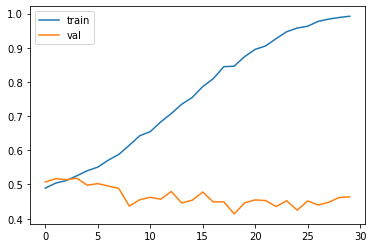

In [18]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

**LOADING EXTRACTED 40 MFCC FEATURES FROM AUDIO DATA**

In [19]:
train_full=pd.read_csv('/content/drive/My Drive/MELD/train_full.csv')
test_full=pd.read_csv('/content/drive/My Drive/MELD/test_full.csv')

In [20]:
train_full.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,dia778_utt6.wav,0.320497,0.025775,2278.267013,2045.001656,4121.995780,0.132658,-309.587878,93.263950,-38.339277,12.680180,-4.150091,-6.342267,-8.869753,-10.267611,-10.339222,-1.431443,-10.255976,2.226234,-15.656542,0.679774,-3.699171,-6.610237,-6.721708,-1.701213,1.218225,5.182283,6.017734,4.042860,-5.014871,1.356073,-5.094019,-2.864031,-1.507544,2.914259,-3.096666,0.053214,-8.140039,-1.970281,-6.474446,-1.136420,-2.799097,0.413544,-1.000970,4.141110,-1.501102,1.494307,negative
1,dia966_utt4.wav,0.309084,0.067537,2023.156253,1795.556596,3739.001465,0.123459,-208.278967,111.048903,-50.069914,16.498679,-23.374736,-0.522334,3.919215,-2.678548,-8.774021,4.992524,-10.629645,-1.141919,-3.900141,6.199353,3.680139,2.178353,-4.498574,-3.838324,-2.324441,3.574812,2.667879,-1.308907,-7.738715,3.880997,-6.713199,2.643777,-2.345348,4.024014,-3.864939,-0.352992,0.279120,3.173884,-1.883913,-2.113838,-2.433435,2.462201,1.314749,6.659592,0.692940,0.589449,positive
2,dia389_utt9.wav,0.432676,0.011799,3127.586425,2383.203487,5598.632813,0.190956,-338.133492,54.222828,-18.611850,40.350187,-10.624277,0.842528,-11.575715,-2.094807,-11.787553,-3.283661,-5.515349,-1.350605,-14.671990,1.010728,-0.525530,-3.958104,-10.262405,-0.936184,-12.591434,-6.095937,-5.396475,0.270805,-3.132982,8.259054,4.181553,5.676305,-1.023473,1.600717,-3.155341,4.556635,-3.425371,2.371289,-3.613290,-0.076630,-8.166666,-2.737811,-4.682549,-4.582378,-4.279526,-2.465241,neutral
3,dia551_utt4.wav,0.285635,0.035523,2047.922606,2030.374706,3823.230092,0.102794,-298.024428,96.304718,-29.053474,16.398453,-11.771029,-3.280554,-11.168737,6.440051,-9.716096,14.528244,-7.446357,2.498292,-11.495910,0.017757,-11.936946,-8.162295,-4.166774,-0.209591,2.165451,10.249691,9.511461,6.751891,3.884187,4.349206,-5.901350,-3.212739,-1.867345,-0.939321,0.794807,-0.600461,-5.272411,-1.252284,-4.265078,0.623148,-3.920346,-1.282380,0.153789,5.926437,-0.658336,-3.207634,neutral
4,dia536_utt4.wav,0.338373,0.018891,2500.453601,2150.128162,4463.414307,0.143191,-383.047866,72.424600,-14.473551,20.726070,-8.213085,0.975116,-6.591600,5.178459,-8.222397,-0.564920,-9.461540,-2.451105,-10.613307,-0.147716,-7.465496,-9.533251,-6.152011,1.223559,-7.573138,0.062299,-7.005039,-2.784093,-2.040869,6.355331,10.544316,15.187030,10.701302,11.555323,3.369436,-4.340157,-7.910988,-3.114532,-5.815084,0.699108,-5.661391,-2.300710,-5.300052,-2.395417,-3.042396,-2.413678,negative


In [21]:
X_full=train_full.drop(['filename','label'],axis=1)
y_full=train_full['label']
X_test=test_full.drop(['filename','label'],axis=1)
y_test=test_full['label']

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.25)

**LABEL ENCODING CATEGORICAL AND SCALING NUMERICAL VARIABLES**

In [23]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_val=le.transform(y_val)
scaler = StandardScaler()
X_train= scaler.fit_transform(np.array(X_train.iloc[:, :], dtype = float))
X_val= scaler.transform(np.array(X_val.iloc[:, :], dtype = float))
y_test=le.fit_transform(y_test)
X_test= scaler.fit_transform(np.array(X_test.iloc[:, :], dtype = float))

**TRAINING MODEL USING DEEP NEURAL NETWORK**

In [24]:
from keras import models
from keras import layers
from keras.optimizers import Adam
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))
opt = tf.keras.optimizers.Adamax(learning_rate=0.0005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=(X_val,y_val))
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)


Train on 7491 samples, validate on 2497 samples
Epoch 1/100
7491/7491 [==============================] - 0s 48us/step - loss: 1.4240 - accuracy: 0.4595 - val_loss: 1.3843 - val_accuracy: 0.5078
Epoch 2/100
7491/7491 [==============================] - 0s 28us/step - loss: 1.3809 - accuracy: 0.4937 - val_loss: 1.3674 - val_accuracy: 0.5114
Epoch 3/100
7491/7491 [==============================] - 0s 25us/step - loss: 1.3570 - accuracy: 0.5045 - val_loss: 1.3551 - val_accuracy: 0.5122
Epoch 4/100
7491/7491 [==============================] - 0s 25us/step - loss: 1.3328 - accuracy: 0.5164 - val_loss: 1.3414 - val_accuracy: 0.5126
Epoch 5/100
7491/7491 [==============================] - 0s 25us/step - loss: 1.3145 - accuracy: 0.5173 - val_loss: 1.3328 - val_accuracy: 0.5110
Epoch 6/100
7491/7491 [==============================] - 0s 27us/step - loss: 1.2974 - accuracy: 0.5273 - val_loss: 1.3244 - val_accuracy: 0.5118
Epoch 7/100
7491/7491 [==============================] - 0s 25us/step - loss

**TRAINING MODEL USING LSTM**

In [ ]:
from keras import models
from keras import layers
X_train= X_train[...,np.newaxis]
X_val = X_val[...,np.newaxis]
X_test= X_test[...,np.newaxis]

model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,batch_size=128,validation_data=(X_val,y_val))
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

Train on 7491 samples, validate on 2497 samples
Epoch 1/20
7491/7491 [==============================] - 18s 2ms/step - loss: 1.0598 - accuracy: 0.4712 - val_loss: 1.0525 - val_accuracy: 0.4666
Epoch 2/20
7491/7491 [==============================] - 18s 2ms/step - loss: 1.0522 - accuracy: 0.4734 - val_loss: 1.0488 - val_accuracy: 0.4666
Epoch 3/20
7491/7491 [==============================] - 17s 2ms/step - loss: 1.0505 - accuracy: 0.4748 - val_loss: 1.0477 - val_accuracy: 0.4670
Epoch 4/20
7491/7491 [==============================] - 17s 2ms/step - loss: 1.0469 - accuracy: 0.4743 - val_loss: 1.0422 - val_accuracy: 0.4642
Epoch 5/20
7491/7491 [==============================] - 18s 2ms/step - loss: 1.0419 - accuracy: 0.4839 - val_loss: 1.0416 - val_accuracy: 0.4754
Epoch 6/20
7491/7491 [==============================] - 17s 2ms/step - loss: 1.0402 - accuracy: 0.4851 - val_loss: 1.0401 - val_accuracy: 0.4714
Epoch 7/20
7491/7491 [==============================] - 17s 2ms/step - loss: 1.039

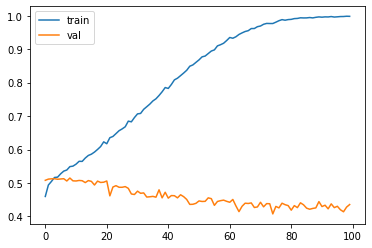

In [25]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()